# Work With Time Series File For ESSP4
There is one time series file for each data set of the form: `DS#_timeSeries.csv`

For example, the relevant file for data set three (3) would be: `DS3_timeSeries.csv`

In [1]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Specify file name

# Specify data set number
dset_num = 0 

# Specify where all the data set folders are, here saved into "essp_dir" variable
essp_dir = '/mnt/home/lzhao/ceph/SolarData/DataSets/Training/'
dset_dir = os.path.join(essp_dir,f'DS{dset_num}')

example_file = os.path.join(dset_dir,f'DS{dset_num}_timeSeries.csv')

## Read in with `pandas`

In [3]:
df = pd.read_csv(example_file)
# Show a snippet of the beginning of the table
df.head()

,Standard File Name,Time [eMJD],RV [m/s],RV Err. [m/s],Exp. Time [s],Airmass,BERV [km/s],Instrument,CCF FWHM [km/s],CCF FWHM Err. [km/s],CCF Contrast,CCF Contrast Err.,BIS [km/s],H-alpha Emission,S Index
0,DS0.001_spec_expres.fits,59332.405937,2.083077,0.180021,169.487000,1.078890,-1.059077e+06,expres,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DS0.002_spec_expres.fits,59332.409727,1.778902,0.180288,168.069000,1.086344,-1.067009e+06,expres,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DS0.003_spec_expres.fits,59332.422520,0.903945,0.192353,167.863007,1.115956,-1.093220e+06,expres,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DS0.004_spec_harpsn.fits,59332.967814,0.824183,0.299046,300.000000,1.320948,-5.109644e-02,harpsn,NaN,NaN,NaN,NaN,NaN,NaN,0.108281
4,DS0.005_spec_harpsn.fits,59332.971814,0.698728,0.301153,300.000000,1.298025,-5.756110e-02,harpsn,NaN,NaN,NaN,NaN,NaN,NaN,0.107987


In [6]:
# Here are all the column names
df.columns

Index(['Standard File Name', 'Time [eMJD]', 'RV [m/s]', 'RV Err. [m/s]',
       'Exp. Time [s]', 'Airmass', 'BERV [km/s]', 'Instrument',
       'CCF FWHM [km/s]', 'CCF FWHM Err. [km/s]', 'CCF Contrast',
       'CCF Contrast Err.', 'BIS [km/s]', 'H-alpha Emission', 'S Index'],
      dtype='object')

#### Plot RVs and Errors

<ErrorbarContainer object of 3 artists>

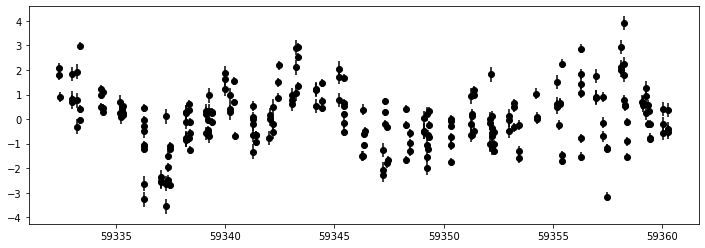

In [7]:
plt.figure(figsize=(12,4))
plt.errorbar(df['Time [eMJD]'],df['RV [m/s]'],yerr=df['RV Err. [m/s]'],
             linestyle='None',marker='o',color='k')

## Rename Columns
I'm not crazy; I know the column names are unwieldy.  Here is code to re-name columns to those of your choosing using `pandas`.  New column names are defined using a dictionary that maps old names to new.  The dictionary does not need to include all column names.

In [8]:
# Here are just some example new column names
# The key should be the original column name; the value should be the new name
col_dict = {
    'Standard File Name' : 'file',
    'Time [eMJD]' : 'time',
    'RV [m/s]' : 'rv',
    'RV Err. [m/s]' : 'e_rv',
    'Exp. Time [s]' : 'exptime',
    'Airmass' : 'airmass',
    'BERV [km/s]' : 'berv',
    'Instrument' : 'inst',
    'CCF FWHM [km/s]' : 'fwhm',
    'CCF FWHM Err. [km/s]' : 'e_fwhm',
    'CCF Contrast' : 'contrast',
    'CCF Contrast Err.' : 'e_contrast',
    'BIS [km/s]' : 'bis',
    'H-alpha Emission' : 'ha',
    'S Index' : 'sval'
}

In [9]:
df = pd.read_csv(example_file)
renamed_df = df.rename(columns=col_dict)
renamed_df.head()

,file,time,rv,e_rv,exptime,airmass,berv,inst,fwhm,e_fwhm,contrast,e_contrast,bis,ha,sval
0,DS0.001_spec_expres.fits,59332.405937,2.083077,0.180021,169.487000,1.078890,-1.059077e+06,expres,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DS0.002_spec_expres.fits,59332.409727,1.778902,0.180288,168.069000,1.086344,-1.067009e+06,expres,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DS0.003_spec_expres.fits,59332.422520,0.903945,0.192353,167.863007,1.115956,-1.093220e+06,expres,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DS0.004_spec_harpsn.fits,59332.967814,0.824183,0.299046,300.000000,1.320948,-5.109644e-02,harpsn,NaN,NaN,NaN,NaN,NaN,NaN,0.108281
4,DS0.005_spec_harpsn.fits,59332.971814,0.698728,0.301153,300.000000,1.298025,-5.756110e-02,harpsn,NaN,NaN,NaN,NaN,NaN,NaN,0.107987


## Read Into Dictionary
If you don't like using `pandas` objects, I recommend using `pandas` to convert into a dictionary of lists.  The only annoying thing with this option is that each time series will be turned into a `list`, not a numpy array, and therefore will be missing some functionality.

Because of the structure of the CSV file and the mix of data types, it is pretty non-trivial to read the file in using `numpy` alone.

In [10]:
df = pd.read_csv(example_file)
data_dict = df.to_dict('list')

<ErrorbarContainer object of 3 artists>

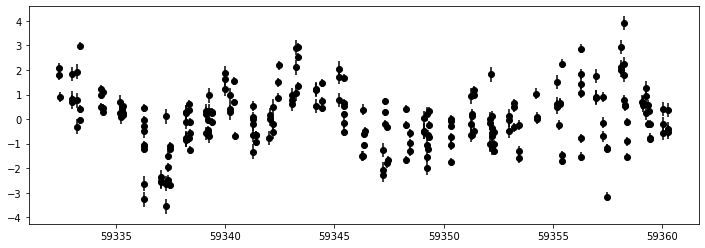

In [11]:
plt.figure(figsize=(12,4))
plt.errorbar(df['Time [eMJD]'],df['RV [m/s]'],yerr=df['RV Err. [m/s]'],
             linestyle='None',marker='o',color='k')